**The k-Nearest Neighbour (KNN) algorithm is a simple yet powerful supervised learning method used for classification and regression tasks. It predicts outcomes based on the proximity of data points.**

Here's a detailed breakdown of how KNN works and why it's useful:

---

### 🧠 What Is KNN?

- **Type**: *Supervised learning algorithm*
- **Purpose**: Primarily used for *classification*, but also applicable to *regression*
- **Nature**: *Non-parametric* (makes no assumptions about data distribution)

---

### ⚙️ How It Works

1. **Training Phase**:
   - KNN doesn’t explicitly train a model. Instead, it stores all the training data.

2. **Prediction Phase**:
   - When a new data point arrives, KNN:
     - Calculates the *distance* (usually Euclidean) between the new point and all training points.
     - Identifies the *k closest points* (neighbors).
     - For classification: assigns the class most common among the neighbors.
     - For regression: takes the average of the neighbors’ values.

---

### 🔢 Choosing the Value of k

- **Small k (e.g., 1)**:
  - Sensitive to noise
  - May overfit
- **Large k**:
  - More generalized
  - May overlook local patterns

A good practice is to test multiple k values using cross-validation to find the optimal one.

---

### 📏 Distance Metrics

Common metrics include:
- **Euclidean distance**: Most popular for continuous variables
- **Manhattan distance**: Useful when data is grid-like
- **Minkowski distance**: Generalization of Euclidean and Manhattan

---

### 🧪 Applications

- **Image recognition**
- **Recommendation systems**
- **Medical diagnosis**
- **Credit scoring**

---

### 🧩 Pros and Cons

| Pros                          | Cons                                 |
|------------------------------|--------------------------------------|
| Simple to implement          | Slow with large datasets             |
| No training time             | Sensitive to irrelevant features     |
| Works well with small data   | Requires feature scaling             |

---

In [71]:
import pandas as pd
df=pd.read_csv('data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Visualize Relationships

Generate a scatter plot showing 'Age' on the x-axis, 'EstimatedSalary' on the y-axis, and use 'Purchased' as the color hue. Additionally, use different markers or a faceting approach to distinguish between 'Gender' (Male/Female) to observe its influence. Ensure the plot has appropriate labels and a legend.


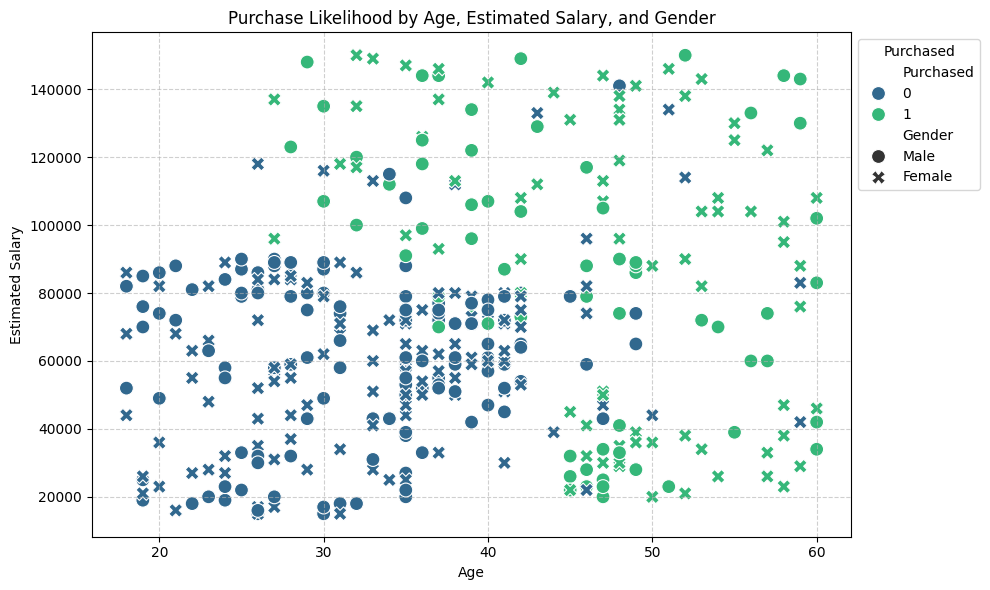

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Generate the scatter plot
sns.scatterplot(
    data=df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']],
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',
    style='Gender', # Use different markers for Gender
    palette='viridis', # Choose a color palette
    s=100, # Adjust marker size
)

# Add plot title and labels
plt.title('Purchase Likelihood by Age, Estimated Salary, and Gender')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Add legend and grid
plt.legend(title='Purchased', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

--- Summary of Observed Relationships ---

Based on the generated visualization:

1. Age and Estimated Salary seem to be strong predictors of purchase. Generally, older individuals and those with higher estimated salaries are more likely to make a purchase.
2. The 'Purchased' (1) group tends to occupy the upper-right region of the plot (higher age, higher salary), while the 'Not Purchased' (0) group is predominantly in the lower-left region.
3. Gender (indicated by different markers) does not appear to create distinctly separate clusters for purchased or not purchased, suggesting its influence might be less direct or interact with Age and Estimated Salary.
4. There might be a threshold-like behavior, where individuals above a certain age and estimated salary are much more likely to purchase, regardless of gender. Below this threshold, purchases are less common.

In [73]:
x=df.iloc[:,1:4].values #2:4 to exclude gender which doesnt affect knn but makes svc poly's false negative increase by 1
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
x[:,0]=en.fit_transform(x[:,0])
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

### **The Min-Max Scaler formula is:**

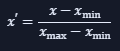

Where:

𝑥
 is the original feature value

𝑥
min
 is the minimum value of the feature

𝑥
max
 is the maximum value of the feature

𝑥
′
 is the scaled value (typically between 0 and 1)

What it does :

Rescales features to a fixed range, usually [0, 1]

Preserves the relationships and distribution of the original data

Sensitive to outliers, since extreme values affect the scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[1.        , 0.02380952, 0.02962963],
       [1.        , 0.4047619 , 0.03703704],
       [0.        , 0.19047619, 0.20740741],
       ...,
       [0.        , 0.76190476, 0.03703704],
       [1.        , 0.42857143, 0.13333333],
       [0.        , 0.73809524, 0.15555556]])

In [76]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred=knn_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [80]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.07

A **confusion matrix** is a performance evaluation tool for classification models. It shows how well the model's predictions match the actual labels.

---

### 📊 Structure of a Confusion Matrix

For a binary classification problem, the matrix looks like this:

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP) | False Negative (FN)|
| **Actual Negative**  | False Positive (FP)| True Negative (TN) |

---

### 🧠 What Each Term Means

- **True Positive (TP)**: Model correctly predicted positive class
- **True Negative (TN)**: Model correctly predicted negative class
- **False Positive (FP)**: Model incorrectly predicted positive (Type I error)
- **False Negative (FN)**: Model incorrectly predicted negative (Type II error)

---

### 📈 Key Metrics Derived

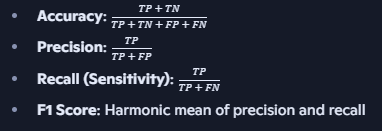

### ✅ Why Use It?

- Gives a detailed breakdown of prediction errors
- Helps identify bias toward certain classes
- Essential for imbalanced datasets where accuracy alone is misleading


In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

Based on the typical structure of a confusion matrix:

**True Negatives (TN): 64**

These are the cases where the actual value was 0 (not purchased), and the model correctly predicted 0. The model correctly identified 64 instances where a purchase was not made.

**False Positives (FP): 4**

These are the cases where the actual value was 0 (not purchased), but the model incorrectly predicted 1 (purchased). The model mistakenly predicted 4 purchases when none occurred.

**False Negatives (FN): 3**

These are the cases where the actual value was 1 (purchased), but the model incorrectly predicted 0 (not purchased). The model failed to identify 3 actual purchases.

**True Positives (TP): 29**

These are the cases where the actual value was 1 (purchased), and the model correctly predicted 1. The model correctly identified 29 instances where a purchase was made.

In [88]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9300


### 🧠 **What Is a Support Vector Machine?**
An SVM tries to find the optimal hyperplane that best separates data points of different classes in a feature space. The goal is to maximize the margin—the distance between the hyperplane and the nearest data points from each class, known as support vectors.
- **Hyperplane**: A decision boundary that separates different classes. In 2D, it’s a line; in 3D, a plane; in higher dimensions, a hyperplane.
- **Support Vectors**: The data points closest to the hyperplane. They are critical in defining the position and orientation of the hyperplane.
- **Margin**: The distance between the hyperplane and the support vectors. A larger margin generally leads to better generalization on unseen data.

🧩 Types of SVM
- **Linear SVM**: Used when data is linearly separable.
- **Non-linear SVM**: Uses ***kernel functions*** (like RBF, polynomial, sigmoid) to transform data into higher dimensions where it becomes linearly separable.

🔧 Key Features
- Effective in **high-dimensional spaces**
- Works well with **clear margin of separation**
- Memory efficient — uses a subset of training points (support vectors)
- Versatile — can be adapted for classification or regression

📊 Applications
- Text classification (e.g., spam detection)
- Image recognition
- Bioinformatics (e.g., cancer classification)
- Handwriting recognition

⚠️ Limitations
- Not ideal for very large datasets (training time can be high)
- Performance drops when data is noisy or overlapping
- Requires careful tuning of kernel and regularization parameters


In [89]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred):.4f}")

Accuracy = 0.8900


In [90]:
svc_model=SVC(kernel='sigmoid')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred):.4f}")

Accuracy = 0.3700


In [91]:
svc_model=SVC(kernel='rbf')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred):.4f}")

Accuracy = 0.9200


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cm_rbf=confusion_matrix(y_test,y_pred)
print(cm_rbf)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

[[64  4]
 [ 4 28]]


In [92]:
svc_model=SVC(kernel='poly')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred):.4f}")
print(classification_report(y_test,y_pred))
cm_poly=confusion_matrix(y_test,y_pred)
print(cm_poly)

Accuracy = 0.9300
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

[[64  4]
 [ 3 29]]
